<a href="https://colab.research.google.com/github/tajrink/cisc-3440/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook demonstrates classification with the MNIST dataset - a dataset for handwritten number recognition. Our goal is to look at a picture of a handwritten digit between 0 and 9, and try to recognize what digit it is.

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib as mlp
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

MNIST with binary classification

In [ ]:
# Fetch the MNIST data using sklearn
mnist = fetch_openml('mnist_784', version=1)

In [ ]:
# For this binary classification task, we will try to classify the MNIST digits
# as 5/not-5. We can use the structure of the sklearn MNIST data to get both our
# data and labels:
X = mnist.data
y = mnist.target

Label:  2


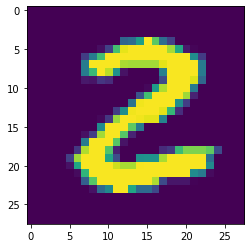

In [ ]:
# As an example, plot a row from the dataset. You can see different examples
# by rerunning this cell with different values of I.
I = 25

print("Label: ", y[I])
plt.imshow(X.iloc[I].values.reshape(28,28))
plt.show()

In [ ]:
# Currently, targets are strings containing the number associated with each row
# of target data. We need to change this to a binary 5/not-5 value.
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
# We can do this with a simple Boolean expression:
y_5 = y == '5'
y_5

0         True
1        False
2        False
3        False
4        False
         ...  
69995    False
69996    False
69997    False
69998     True
69999    False
Name: class, Length: 70000, dtype: bool

In [ ]:
# Retrieve the train/test split from the dataset.
# The MNIST digits are already divided into a train/test split:
# the first 60,000 rows are the training set, and the rest are the test set.
X_train, y_train_5, X_test, y_test_5 = X[:60000], y_5[:60000], X[60000:], y_5[60000:]

len(X_train), len(X_test)

(60000, 10000)

In [ ]:
# Let's do a 3-fold cross validation to evaluate two different models.

model_sgd = SGDClassifier()
sgd_scores = cross_val_score(model_sgd, X_train, y_train_5, cv=3, scoring="f1")

In [ ]:
sgd_scores

array([0.7604733 , 0.72242833, 0.78645516])

In [ ]:
model_knn = KNeighborsClassifier()
knn_scores = cross_val_score(model_knn, X_train, y_train_5, cv=3, scoring="f1")

In [ ]:
knn_scores

array([0.9671675 , 0.9610245 , 0.96143097])

In [ ]:
from sklearn import metrics
# K-nearest-neighbors is performing better, so we select it and evaluate on the
# test set for a final performance measue.
model_knn.fit(X_train, y_train_5)
y_pred = model_knn.predict(X_test)
metrics.f1_score(y_test_5, y_pred)

0.9655172413793103

MNIST with multiclass classification

In [ ]:
# Try K-NN. This time, we'll evaluate on accuracy, since that is
# what the homework wants.

# We are doing multiclass classification. Get the original numeric data:
y_train_multiclass, y_test_multiclass =y[:60000], y[60000:]
y_train_multiclass

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
# Try 3-fold cross-validation on a K-nearest-neighbor using the default settings.

model_knn = KNeighborsClassifier()

# The model will automatically train as multiclass because it has all 10
# numeric labels in y.
knn_scores = cross_val_score(model_knn, X_train, y_train_multiclass, cv=3, scoring="accuracy")
print("KNN", knn_scores)

KNN [0.9676  0.9671  0.96755]


In [ ]:
# Start Question 2 of the homework here. Try to get a final score above 97%
# with multiclass classification using a grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
space = [{"weights": ["uniform", "distance"],"n_neighbors": [2, 3, 5, 7] } ]

In [ ]:
knn_grid_search = GridSearchCV(model_knn, param_grid=space, cv=3, scoring="accuracy", return_train_score = False)
knn_grid_search.fit(X_train, y_train_multiclass)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             scoring='accuracy')

In [ ]:
print(knn_grid_search.best_estimator_)
print(knn_grid_search.best_score_)
print(knn_grid_search.best_params_)

KNeighborsClassifier(n_neighbors=3, weights='distance')
0.9693333333333333
{'n_neighbors': 3, 'weights': 'distance'}
